# Project - Simple Avocado Price Prediction

In this project, I will create a __linear regression model__ and a __one hidden layer NN__ on estimating the function that represents the price of Avocados based on historical data. This should be done using only numpy and basic python - i.e not using higher-level packages. Basic machine learning consideration when preprocessing and handling data need to be taken in consideration. Lines of code should be commented thoroughly to show understanding.




In [33]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina'

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load and prepare the data

In [34]:
data_path = 'avocado.csv'

avocado = pd.read_csv(data_path)

In [3]:
avocado.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [137]:
### sort the date format
#avocado['Date'] = pd.to_datetime(avocado['Date'])

In [141]:
''' sort the date in ascending order '''
#avocado = avocado.sort_values(by='Date')

In [39]:
avocado.dtypes # check the data types

Unnamed: 0        int64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

In [40]:
avocado[avocado.isnull().any(axis=1)] # clean the null values

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region


That is great, no null values, I will skip the process of detect the outliers, it will take too long. But it is easy to implement with anomalous detection algorithms (like gaussian kernel). 

### Statistics of Data
We show the statistics of the data below: 

In [41]:
avocado.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [42]:
import plotly
import plotly.offline as py
import plotly.graph_objs as go

Type=avocado.groupby('type')['Total Volume'].agg('sum')

values=[Type['conventional'],Type['organic']]
labels=['conventional','organic']

trace=go.Pie(labels=labels,values=values)
py.iplot([trace])

/anaconda3/envs/deep-learning/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



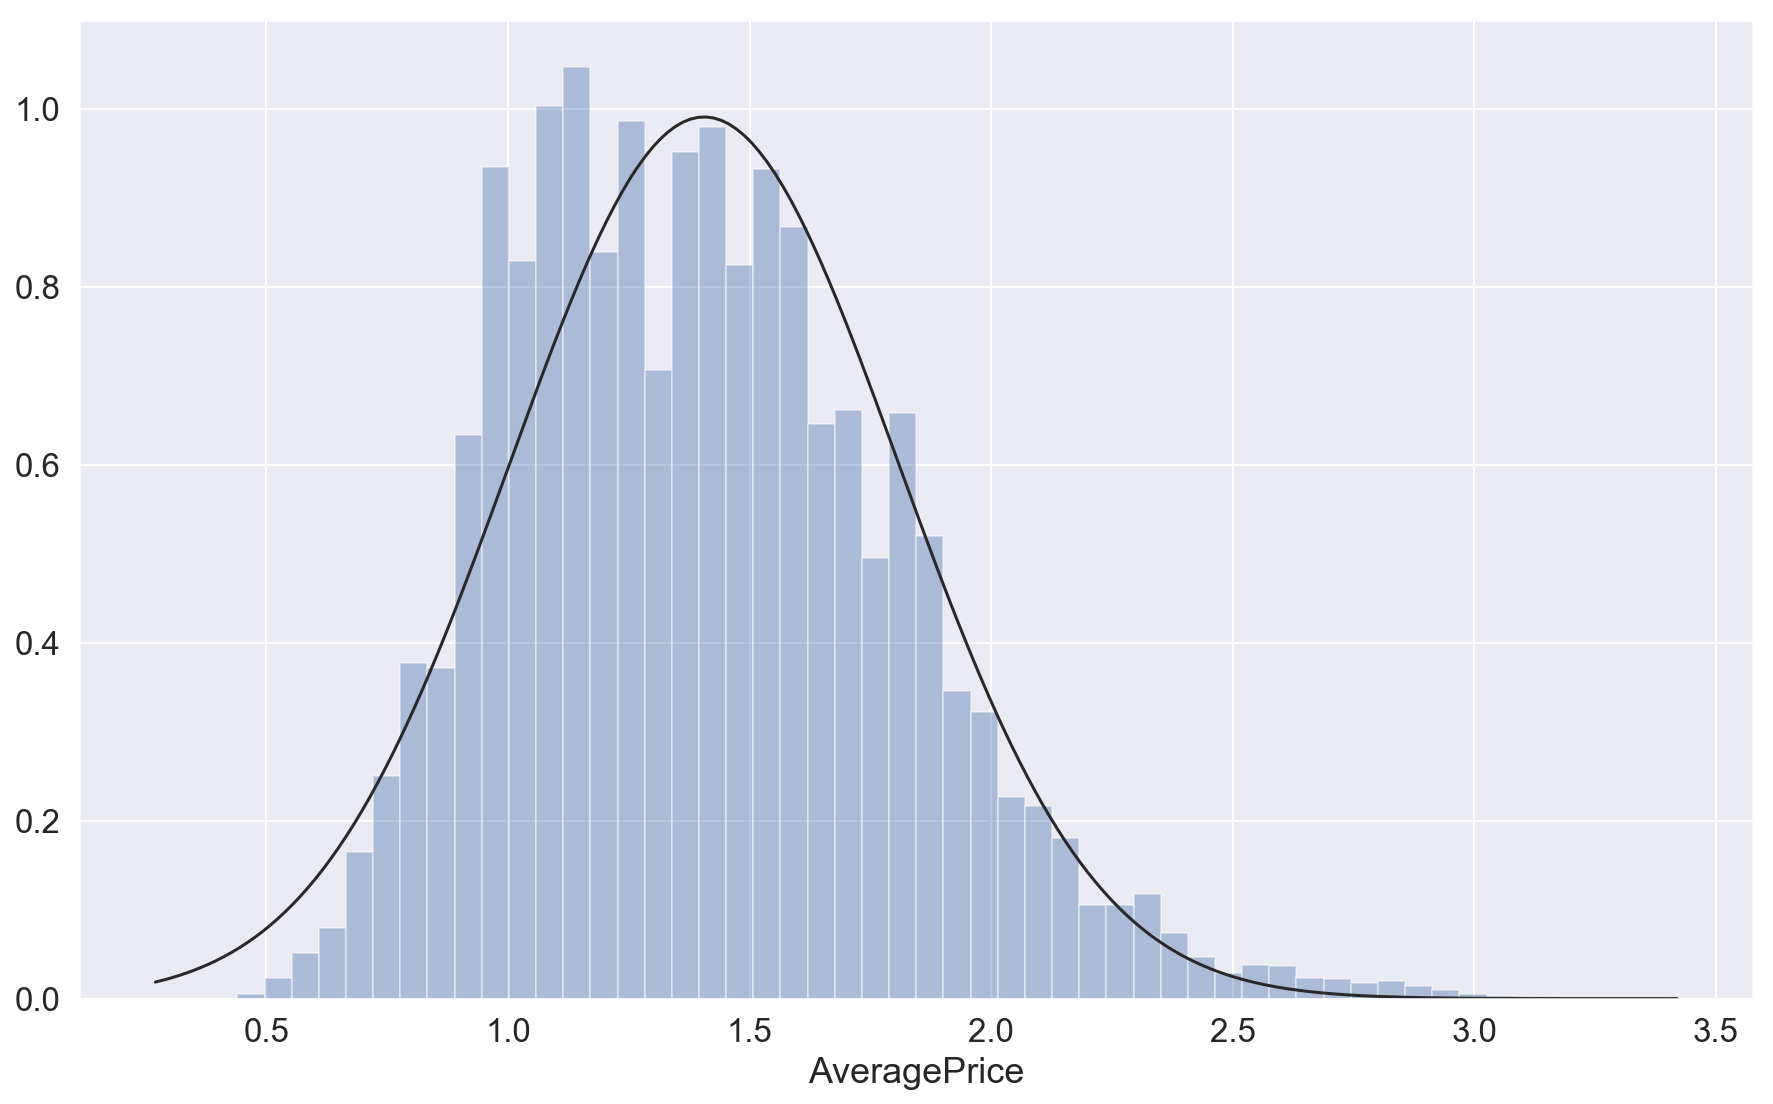

In [43]:
import seaborn as sns
sns.set(font_scale=1.5) 
from scipy.stats import norm
fig, ax = plt.subplots(figsize=(15, 9))
sns.distplot(a=avocado.AveragePrice, kde=False, fit=norm)

We can now see that our price data is almost like a skewed normal distribution. 

### Categorical values:
We are now going to dealing with the categorical values, one hot encoding or other techniques up to our choice. 

In [44]:
pd.get_dummies(avocado, columns=["type", "region"], prefix=["type", "region"]).head()


,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,...,region_SouthCarolina,region_SouthCentral,region_Southeast,region_Spokane,region_StLouis,region_Syracuse,region_Tampa,region_TotalUS,region_West,region_WestTexNewMexico
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,...,0,0,0,0,0,0,0,0,0,0
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,...,0,0,0,0,0,0,0,0,0,0
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,...,0,0,0,0,0,0,0,0,0,0
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,...,0,0,0,0,0,0,0,0,0,0
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,...,0,0,0,0,0,0,0,0,0,0


In [45]:
pd.get_dummies(avocado, columns=["type"], prefix=["type"]).tail()


,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region,type_conventional,type_organic
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,2018,WestTexNewMexico,0,1
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,2018,WestTexNewMexico,0,1
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,2018,WestTexNewMexico,0,1
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,2018,WestTexNewMexico,0,1
18248,11,2018-01-07,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,2018,WestTexNewMexico,0,1


In [46]:
avocado["type"].value_counts()

conventional    9126
organic         9123
Name: type, dtype: int64

There are only two types, great! We can make a binary feature, or we can choose which type to run our model on.

In [47]:
#avocado["type_binary"] = np.where(avocado["type"].str.contains("conventional"), 1, 0)

In [48]:
#avocado.head()

In [49]:
avocado["region"].value_counts() # We have too many regions, one-hot encoding may be expensive here

NewYork                338
Philadelphia           338
Boston                 338
DallasFtWorth          338
HarrisburgScranton     338
Denver                 338
Chicago                338
Spokane                338
Louisville             338
Detroit                338
CincinnatiDayton       338
Houston                338
Syracuse               338
StLouis                338
Midsouth               338
PhoenixTucson          338
Sacramento             338
Atlanta                338
Southeast              338
Roanoke                338
BuffaloRochester       338
SanFrancisco           338
Tampa                  338
West                   338
Boise                  338
NorthernNewEngland     338
LasVegas               338
California             338
Nashville              338
Orlando                338
Columbus               338
RaleighGreensboro      338
Portland               338
Pittsburgh             338
SouthCentral           338
NewOrleansMobile       338
BaltimoreWashington    338
P

Because all the regions are within US, it is reasonable to drop the `TotalUS` region which is obsolete. 

In [50]:
avocado = avocado[avocado.region != 'TotalUS']

In [51]:
avocado["Date"].value_counts() # We have too many regions, one-hot encoding may be expensive
# here. In fact, backward difference encoding might works well? 

2017-05-14    106
2016-03-06    106
2017-02-05    106
2016-06-05    106
2015-05-31    106
2017-10-29    106
2017-11-19    106
2016-11-27    106
2017-03-05    106
2015-07-19    106
2016-12-04    106
2015-01-04    106
2016-03-13    106
2017-04-16    106
2015-09-27    106
2018-02-25    106
2018-02-04    106
2017-07-16    106
2015-02-01    106
2018-01-28    106
2016-05-01    106
2018-01-14    106
2017-08-20    106
2017-08-06    106
2015-08-23    106
2017-02-26    106
2015-06-07    106
2015-05-03    106
2016-12-11    106
2018-03-11    106
             ... 
2015-11-29    106
2016-01-24    106
2018-01-21    106
2016-08-28    106
2017-01-01    106
2016-12-25    106
2016-01-17    106
2017-10-01    106
2015-11-08    106
2015-12-20    106
2017-10-08    106
2016-07-17    106
2015-07-05    106
2017-01-15    106
2016-11-06    106
2017-04-30    106
2015-01-11    106
2016-08-07    106
2017-12-03    106
2017-09-24    106
2017-04-02    106
2015-03-22    106
2015-05-10    106
2016-08-14    106
2017-12-10

In [52]:
avocado["year"].value_counts() # The year of Avocados

2017    5616
2016    5512
2015    5511
2018    1272
Name: year, dtype: int64

There are four years. 

In [53]:
### We can also choose to predict the values for specific region: 

#avocado['Date'] = pd.to_datetime(avocado['Date'])
#regions = avocado.groupby(avocado.region)
#PREDICTING_FOR = "TotalUS"
#date_price = regions.get_group(PREDICTING_FOR).reset_index(drop=True)
#date_price = regions.get_group(PREDICTING_FOR)[['Date', 'AveragePrice','Total Volume']].reset_index(drop=True)

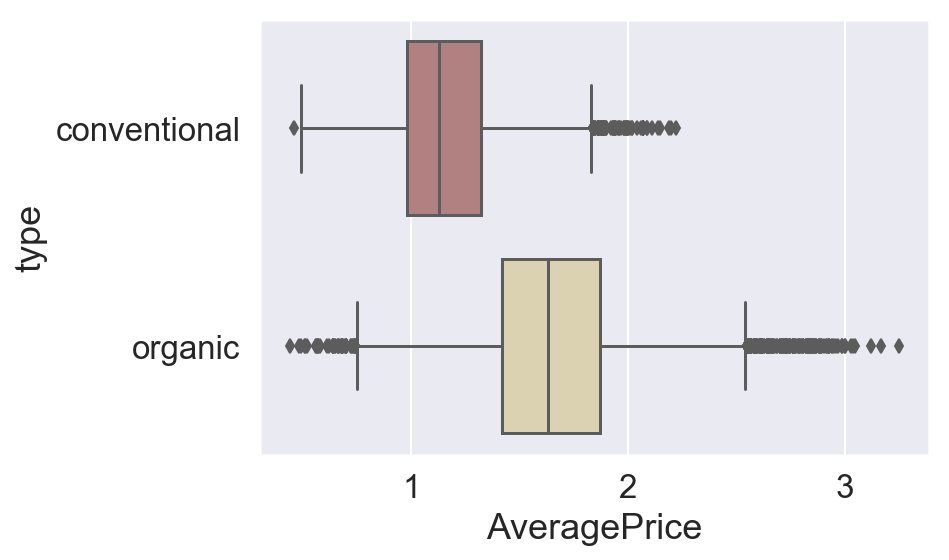

In [54]:
### Box plot
sns.boxplot(y="type", x="AveragePrice", data=avocado, palette = 'pink')

From above Figure we can see that the Organic avocado are generally more expensive (mean price) than the conventional avocados. 

/anaconda3/envs/deep-learning/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning:

The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.

/anaconda3/envs/deep-learning/lib/python3.6/site-packages/seaborn/categorical.py:3672: UserWarning:

The `size` paramter has been renamed to `height`; please update your code.



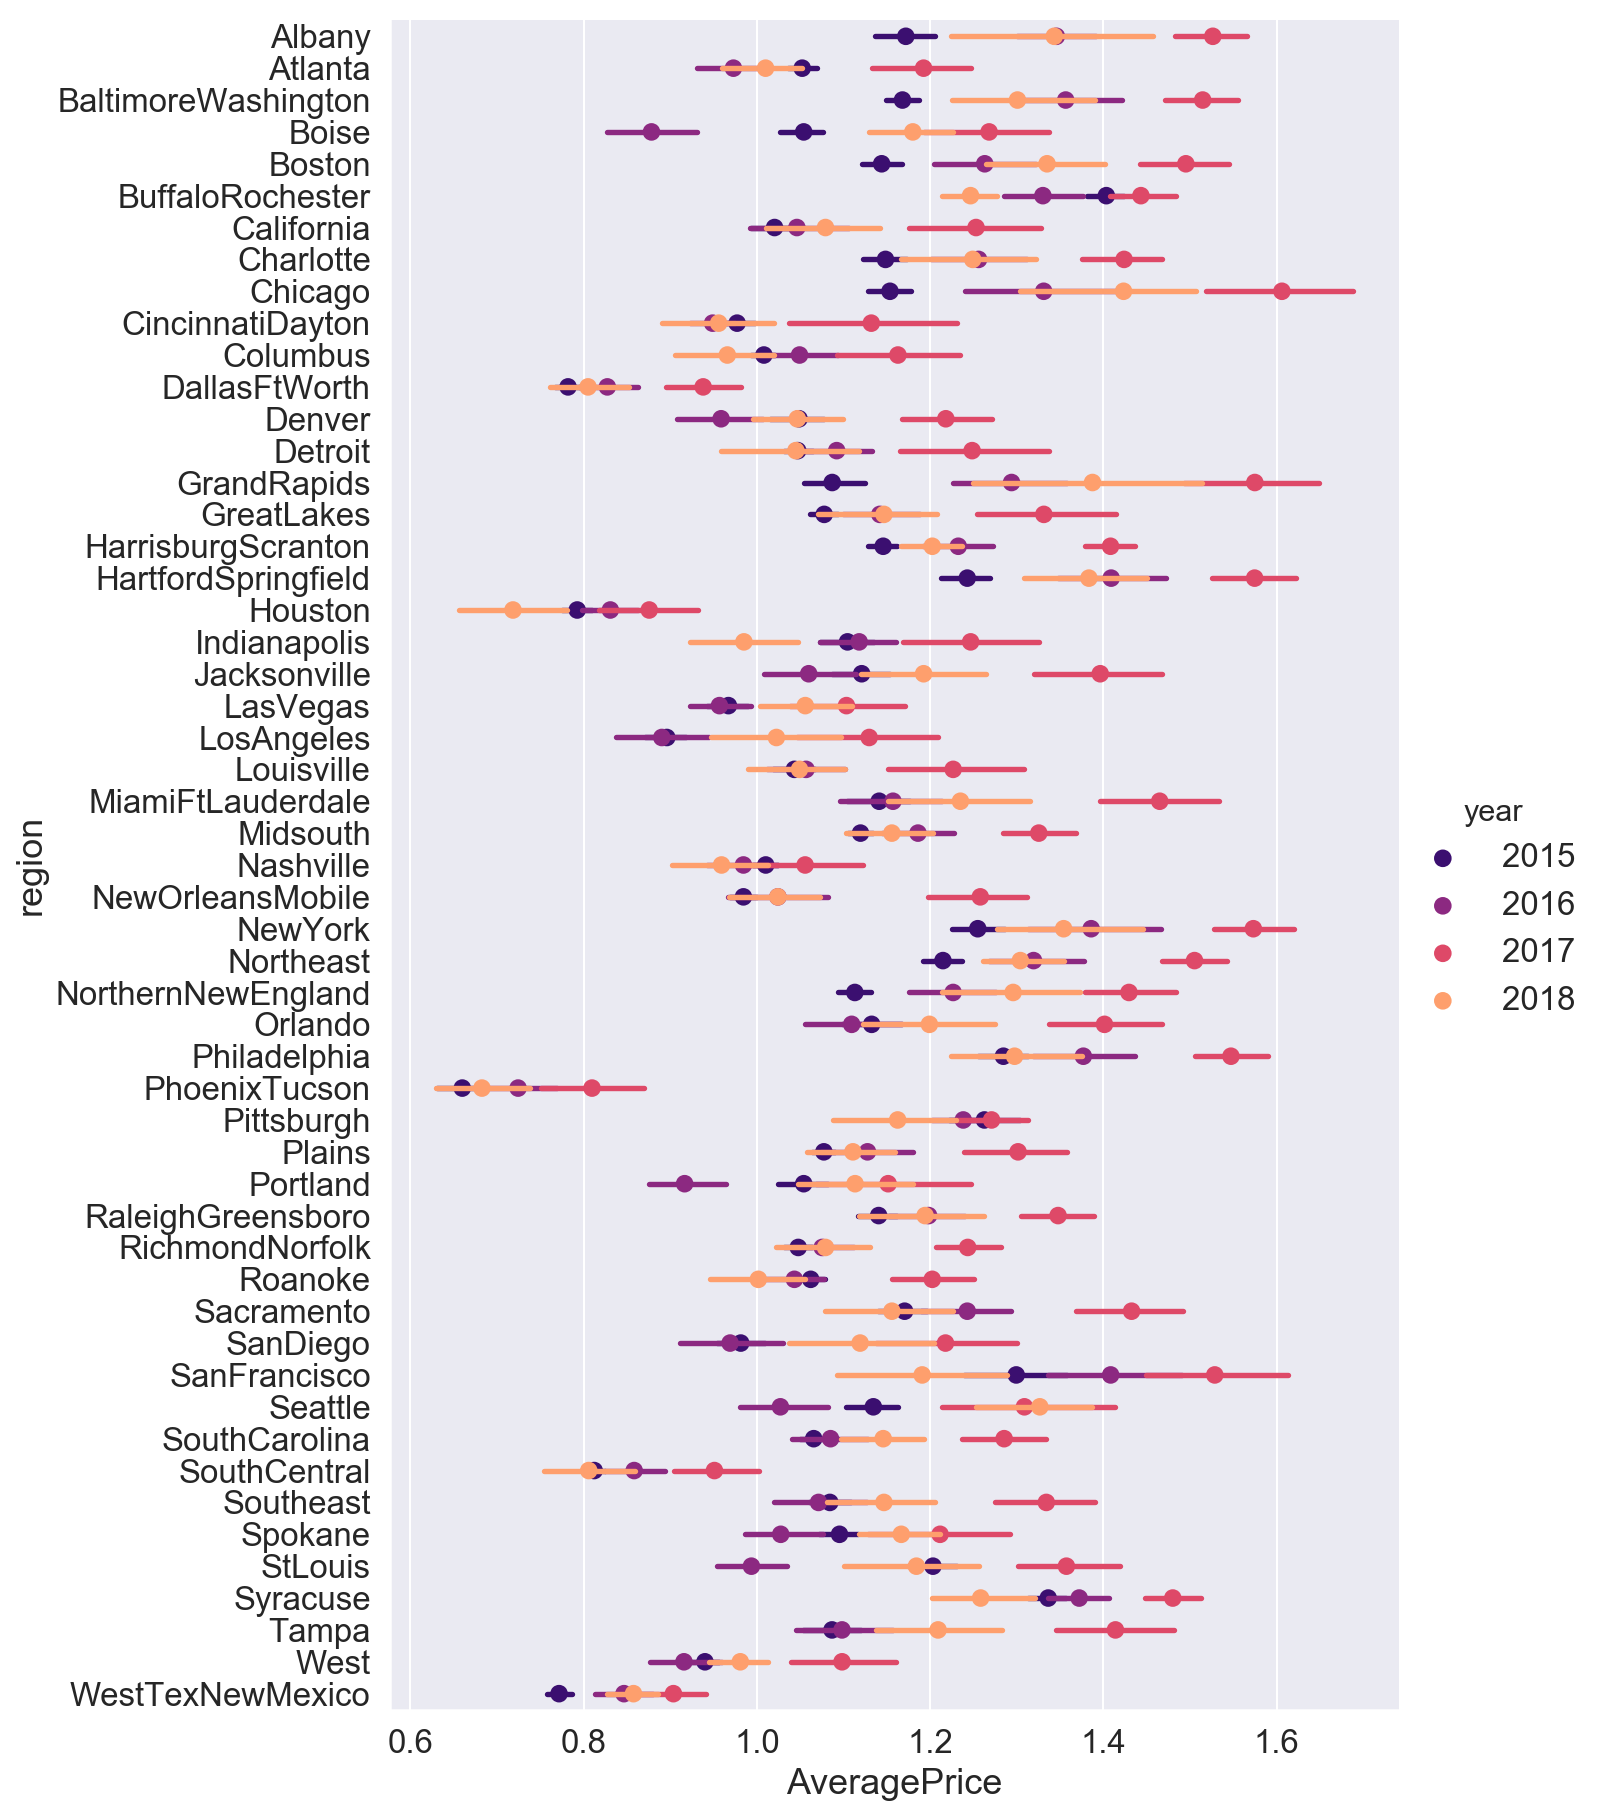

In [55]:
mask = avocado['type']=='conventional'
g = sns.factorplot('AveragePrice','region',data=avocado[mask],
                   hue='year',
                   size=13,
                   aspect=0.8,
                   palette='magma',
                   join=False,
              )

The average price of conventional avocado in Chicago during 2017 and 2018 reaches its peak of all time in our data, and its due to shortage of storage in 2017 US.

In [56]:
### Correlation matrix
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
dicts = {}
avocado_copy = avocado
label.fit(avocado.type.drop_duplicates()) 
dicts['type'] = list(label.classes_)
avocado_copy.type = label.transform(avocado_copy.type) 

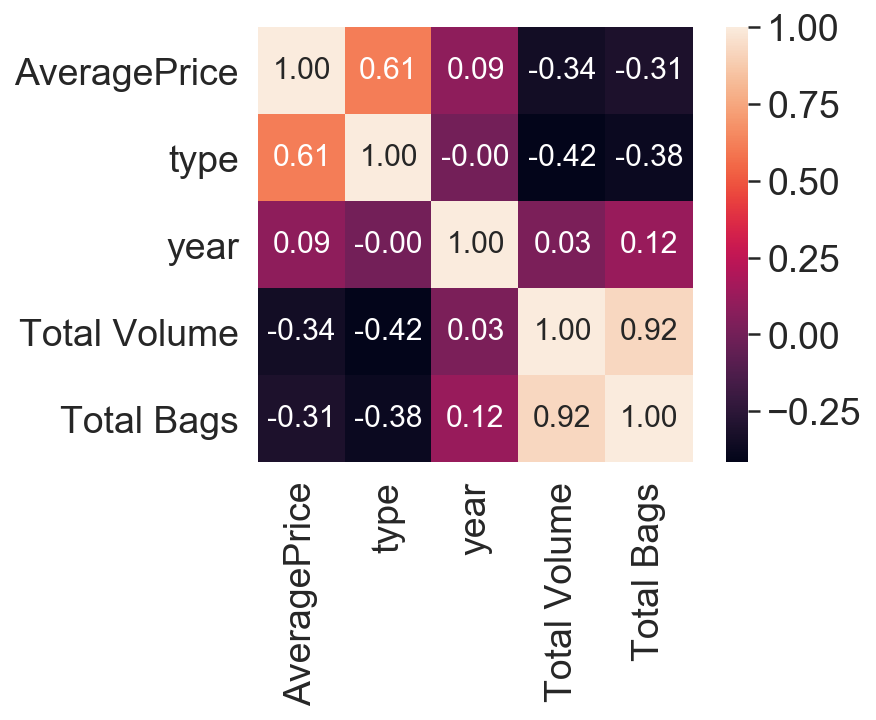

In [57]:
cols = ['AveragePrice','type','year','Total Volume','Total Bags']
cm = np.corrcoef(avocado_copy[cols].values.T)
sns.set(font_scale = 1.7)
hm = sns.heatmap(cm,cbar = True, annot = True,square = True, fmt = '.2f', annot_kws = {'size':15}, yticklabels = cols, xticklabels = cols)

From the above matrix, we see strong positive relationship between price and type of avocado. We also observed that strong positive relationship between total bags and total volume of Avocado. Logistic regression can be used to predict the type of avocado and softmax function with DNN for classified the regions of avocado. We might consider to reduce the dimensions of our data if two features are strong correlated. 

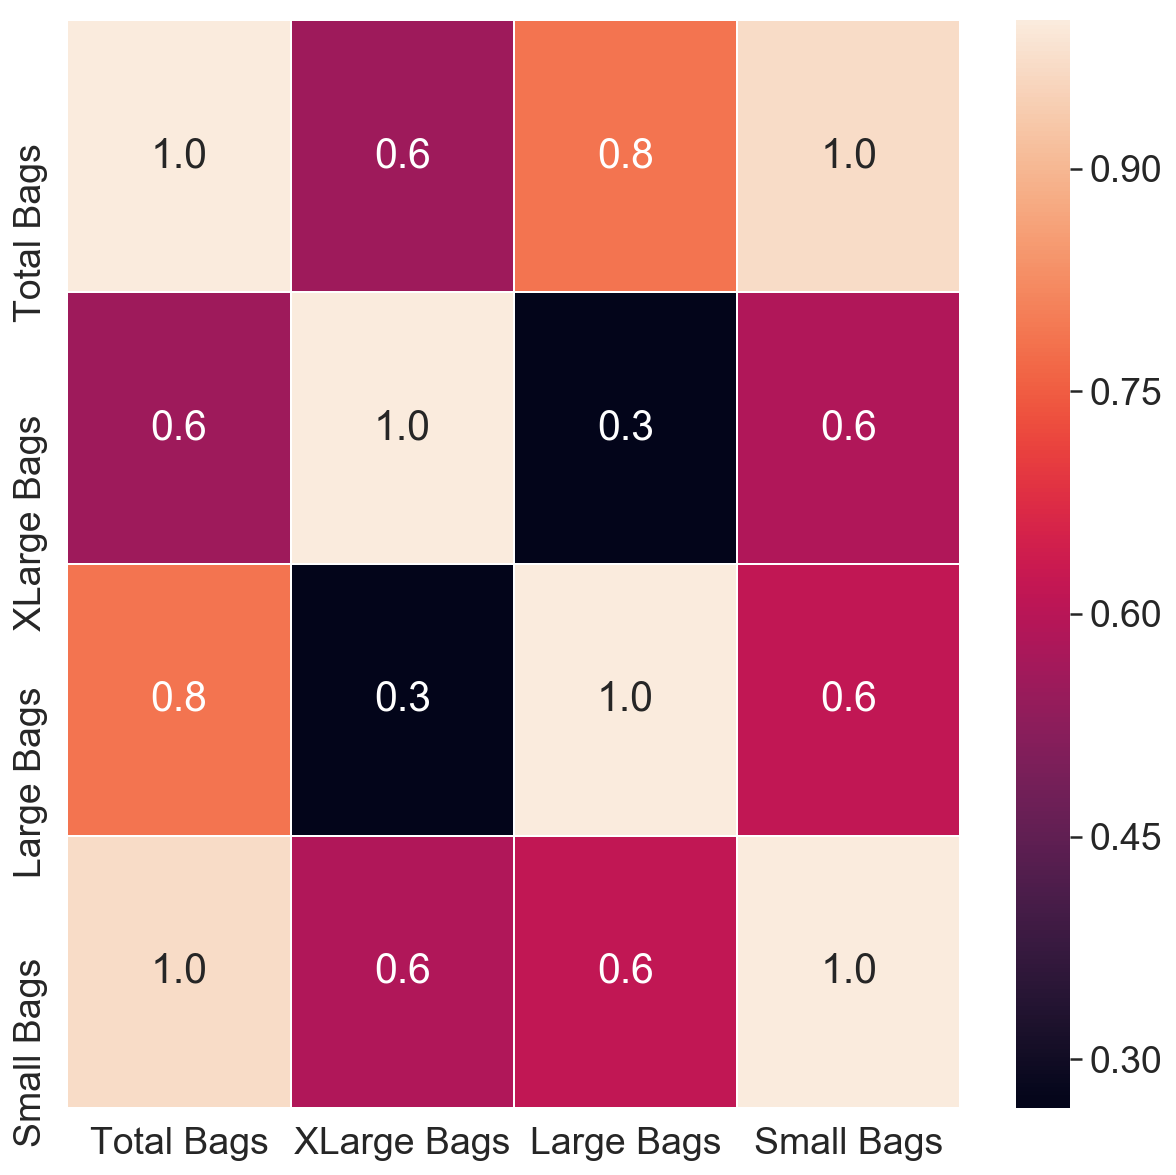

In [58]:
cols = ['Total Bags','XLarge Bags','Large Bags','Small Bags']
f,ax2=plt.subplots(figsize=(10,10))
sns.heatmap(avocado_copy[cols].corr(),annot=True, linewidth=.5, fmt='.1f',ax=ax2)
plt.show()

The total bags is most likely affected by large bags. 

### Conventional price data: 

In [25]:
avocado = avocado[avocado.region != 'TotalUS']

In [26]:
avocado["type_binary"] = np.where(avocado["type"].str.contains("conventional"), 1, 0)

In [27]:
avocado['Date'] = pd.to_datetime(avocado['Date'])
regions = avocado.groupby(avocado.type)
PREDICTING_FOR = "conventional"
organic_price = regions.get_group(PREDICTING_FOR).reset_index(drop=True)

In [28]:
organic_price["type"].value_counts()

conventional    8957
Name: type, dtype: int64

In [24]:
organic_price.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,type_binary
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,1
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,1
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,1
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,1
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,1


In [17]:
# ''' method 1: oridinal region data'''
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
# organic_price['region'] = le.fit_transform(organic_price['region'])

# ''' We need to drop all the dummy fields, and one-hot encoding some features'''
# dummy_field = ['year']
# dummies = pd.get_dummies(organic_price, columns=dummy_field, prefix=dummy_field, drop_first=False)
# fields_to_drop = ['type', 'type_binary', 'Date','Unnamed: 0']
# #fields_to_drop = ['region', 'type', 'Date','Unnamed: 0']
# data_short = dummies.drop(fields_to_drop, axis=1)
# data_short.head()

In [22]:
''' method 2: We need to drop all the dummy fields, and one-hot encoding some features'''
dummy_field = ['year','region']
dummies = pd.get_dummies(organic_price, columns=dummy_field, prefix=dummy_field, drop_first=False)
#fields_to_drop = ['type', 'type_binary', 'Date','Unnamed: 0']
fields_to_drop = ['type', 'type_binary', 'Date','Unnamed: 0']
data_short = dummies.drop(fields_to_drop, axis=1)
data_short.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year_2015,...,region_Seattle,region_SouthCarolina,region_SouthCentral,region_Southeast,region_Spokane,region_StLouis,region_Syracuse,region_Tampa,region_West,region_WestTexNewMexico
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,1,...,0,0,0,0,0,0,0,0,0,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,1,...,0,0,0,0,0,0,0,0,0,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,1,...,0,0,0,0,0,0,0,0,0,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,1,...,0,0,0,0,0,0,0,0,0,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,1,...,0,0,0,0,0,0,0,0,0,0


### Total data encoded and numericalized

In [504]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
avocado['region'] = le.fit_transform(avocado['region'])
avocado.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,type_binary
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,0,1
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,0,1
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,0,1
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,0,1
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,0,1


In [284]:
''' We need to drop all the dummy fields, and one-hot encoding some features'''
dummy_field = ['year']
dummies = pd.get_dummies(avocado, columns=dummy_field, prefix=dummy_field, drop_first=False)
fields_to_drop = ['type', 'Date','Unnamed: 0']
#fields_to_drop = ['type', 'Date','Unnamed: 0']
data = dummies.drop(fields_to_drop, axis=1)
data.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,region,type_binary,year_2015,year_2016,year_2017,year_2018
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,1,1,0,0,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,1,1,0,0,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,1,1,0,0,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,1,1,0,0,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,1,1,0,0,0


Does the region of the Avocados really matters? Yes, it matters. 

## Checking out the data

This dataset has the average prices for avocado sales for quantities from 2015 to 2018. The avocado is classified as `conventional`  and `organic`, it can also be distinguished between different regions within the `US`.  

In [35]:
avocado_temp = pd.read_csv(data_path)
types = avocado_temp.groupby(avocado_temp.type)
PREDICTING_FOR = 'conventional'
prices = types.get_group(PREDICTING_FOR)[['Date', 'AveragePrice']].reset_index(drop=True)

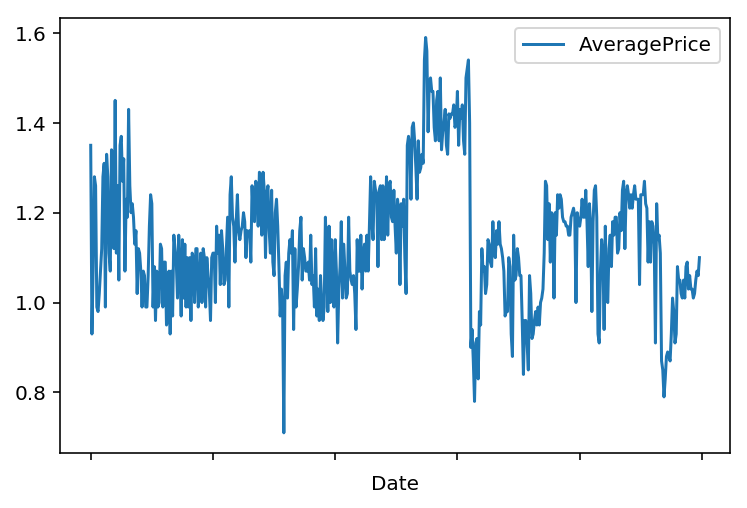

In [36]:
prices[1:500].plot(x='Date', y='AveragePrice', kind="line")
del avocado_temp, prices, types

### Scaling target variables
To make training the network easier, we'll standardize each of the continuous variables. That is, we'll shift and scale the variables such that they have zero mean and a standard deviation of 1.

The scaling factors are saved so we can go backwards when we use the network for predictions.

In [481]:
data = data.rename(index=str, columns={"Total Volume": "t_volume", "Total Bags": "t_bags", 
                                "Small Bags": "s_bags", "Large Bags": "l_bags", "XLarge Bags": "xl_bags"});

In [482]:
data.head()

,AveragePrice,t_volume,4046,4225,4770,t_bags,s_bags,l_bags,xl_bags,region,type_binary,year_2015,year_2016,year_2017,year_2018
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,1,1,0,0,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,1,1,0,0,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,1,1,0,0,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,1,1,0,0,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,1,1,0,0,0


In [483]:
''' Mean normalization features'''

quant_features = ['AveragePrice', 't_volume','4046', '4225', '4770', 't_bags', 'region', 
                  's_bags', 'l_bags', 'xl_bags']
#quant_features = ['AveragePrice', 't_volume','4046', '4225', '4770', 't_bags', 'region']
#quant_features = ['t_volume','4046', '4225', '4770', 't_bags', 's_bags', 'l_bags',
#                  'xl_bags']

# Store scalings features in a dictionary, in case we need convert them back.
scaled_features = {}
for each in quant_features:
    mean, std = data[each].mean(), data[each].std()
    scaled_features[each] = [mean, std]
    data.loc[:, each] = (data[each] - mean)/std
print("scaled_features: ", scaled_features)

scaled_features:  {'AveragePrice': [1.405978409775878, 0.40267655549555065], 't_volume': [850644.0130089321, 3453545.3553994712], '4046': [293008.4245306592, 1264989.0817627772], '4225': [295154.56835607433, 1204120.4011350507], '4770': [22839.73599265713, 107464.06843537073], 't_bags': [239639.20205983886, 986242.3992164118], 'region': [26.49564359690942, 15.583787874697272], 's_bags': [182194.68669570936, 746178.5149617889], 'l_bags': [54338.08814455587, 243965.96454740883], 'xl_bags': [3106.426507205874, 17692.894651916486]}


In [484]:
data.head()

,AveragePrice,t_volume,4046,4225,4770,t_bags,s_bags,l_bags,xl_bags,region,type_binary,year_2015,year_2016,year_2017,year_2018
0,-0.188683,-0.227710,-0.230810,-0.199897,-0.212086,-0.234164,-0.232640,-0.222346,-0.175575,-1.700206,1,1,0,0,0
1,-0.139016,-0.230420,-0.231096,-0.208049,-0.211991,-0.233344,-0.231562,-0.222329,-0.175575,-1.700206,1,1,0,0,0
2,-1.182037,-0.212079,-0.231001,-0.154474,-0.211319,-0.234723,-0.233393,-0.222305,-0.175575,-1.700206,1,1,0,0,0
3,-0.809529,-0.223438,-0.230734,-0.185345,-0.211858,-0.237090,-0.236562,-0.222180,-0.175575,-1.700206,1,1,0,0,0
4,-0.312853,-0.231531,-0.230885,-0.208713,-0.211829,-0.236712,-0.236148,-0.221918,-0.175575,-1.700206,1,1,0,0,0


### Scaling target variable for chosen type of avocado data

In [37]:
data_short = data_short.rename(index=str, columns={"Total Volume": "t_volume", "Total Bags": "t_bags", 
                                "Small Bags": "s_bags", "Large Bags": "l_bags", "XLarge Bags": "xl_bags"});

In [38]:
''' Mean normalization features'''
#quant_features = ['AveragePrice', 't_volume','t_bags']
# quant_features = ['AveragePrice', 't_volume','4046', '4225', '4770', 't_bags', 's_bags', 'l_bags',
#                  'xl_bags']
quant_features = ['AveragePrice', 't_volume','4046', '4225', '4770', 't_bags', 's_bags', 'l_bags',
                 'xl_bags']

# Store scalings features in a dictionary, in case we need convert them back.
scaled_features = {}
for each in quant_features:
    mean, std = data_short[each].mean(), data_short[each].std()
    scaled_features[each] = [mean, std]
    data_short.loc[:, each] = (data_short[each] - mean)/std
print("scaled_features: ", scaled_features)

scaled_features:  {'AveragePrice': [1.159285475047449, 0.26427913258454755], 't_volume': [1047895.4253600534, 1573976.0047827605], '4046': [362906.56185776484, 682869.8377422125], '4225': [366502.38392988726, 587011.5966314453], '4770': [28928.472886010943, 65967.94650150293], 't_bags': [289558.00601652334, 476897.5181735432], 's_bags': [221184.95648654684, 364417.0268216563], 'l_bags': [64440.158846712075, 154871.72417379788], 'xl_bags': [3932.8895668192476, 11237.837298377204]}


In [39]:
data_short.head()

,AveragePrice,t_volume,4046,4225,4770,t_bags,s_bags,l_bags,xl_bags,year_2015,...,region_Seattle,region_SouthCarolina,region_SouthCentral,region_Southeast,region_Spokane,region_StLouis,region_Syracuse,region_Tampa,region_West,region_WestTexNewMexico
0,0.645963,-0.624952,-0.529925,-0.531587,-0.437793,-0.588934,-0.583346,-0.415485,-0.349969,1,...,0,0,0,0,0,0,0,0,0,0
1,0.721640,-0.630898,-0.530456,-0.548309,-0.437639,-0.587238,-0.581139,-0.415458,-0.349969,1,...,0,0,0,0,0,0,0,0,0,0
2,-0.867588,-0.590654,-0.530279,-0.438412,-0.436545,-0.590090,-0.584887,-0.415421,-0.349969,1,...,0,0,0,0,0,0,0,0,0,0
3,-0.300007,-0.615577,-0.529786,-0.501738,-0.437423,-0.594985,-0.591376,-0.415224,-0.349969,1,...,0,0,0,0,0,0,0,0,0,0
4,0.456769,-0.633336,-0.530065,-0.549672,-0.437374,-0.594203,-0.590529,-0.414811,-0.349969,1,...,0,0,0,0,0,0,0,0,0,0


### Splitting the data into training, testing, and validation sets

We'll save the data for the last approximately 2 percent of data to use as a test set after we've trained the network. We'll use this set to make predictions and compare them with the actual number of riders.

In [256]:
from sklearn.model_selection import train_test_split
shuffle = False
''' devide into train, cross validation and test sets'''
train_set, test_set = train_test_split(data, test_size=0.02,shuffle=shuffle)
# Separate the data into features and targets
target_fields = ['AveragePrice']
features, targets = train_set.drop(target_fields, axis=1), train_set[target_fields]
test_features, test_targets = test_set.drop(target_fields, axis=1), test_set[target_fields]
features.head()
print("number of features =", features.shape[1])

train_features, val_features = train_test_split(features, test_size=0.4,shuffle=shuffle)
train_targets, val_targets = train_test_split(targets, test_size=0.4,shuffle=shuffle)

number of features = 14


In [257]:
train_set['AveragePrice'].head()

0   -0.188683
1   -0.139016
2   -1.182037
3   -0.809529
4   -0.312853
Name: AveragePrice, dtype: float64

Well, we will have 76 features in total if we encoded all categorical features, I am thinking about using PCA or other dimenstionality reduction techniques. However, it would took too long to implement them from scratch in Python. 

In [40]:
# check the size of examples
print(np.size(train_features))
print(np.size(test_features))
np.size(val_features)

NameError: name 'train_features' is not defined

### Splitting the data into training, test, and validation sets for type of avocado data
Get the data set for conventional Avocado training data example

In [41]:
from sklearn.model_selection import train_test_split
shuffle = False
''' devide into train, cross validation and test sets'''
train_set, test_set = train_test_split(data_short, test_size=0.1, shuffle=shuffle)
# Separate the data into features and targets
target_fields = ['AveragePrice']
features, targets = train_set.drop(target_fields, axis=1), train_set[target_fields]
test_features, test_targets = test_set.drop(target_fields, axis=1), test_set[target_fields]
features.head()
print("number of features =", features.shape[1])

train_features, val_features = train_test_split(features, test_size=0.15, shuffle=shuffle)
train_targets, val_targets = train_test_split(targets, test_size=0.15, shuffle=shuffle)

number of features = 65


In [42]:
# check the size of examples
print(np.size(train_features))
print(test_features.shape)
np.size(val_features)

445315
(896, 65)


78650

## Build the linear regression: 

### Unit test: 
We will test our linear regression solver on a two dimensional data example first, and compare it with results calculated from analytical method such as `normal equation`, (or we can validated its numerical gradient using `finite difference method`) and see how well it performs. 

In [48]:
from linearReg import LinearRegression

In [83]:
## create our 2D test data set: 
X= np.array([-15.9368,-29.1530,36.1895,37.4922,-48.0588,-8.9415,
             15.3078,-34.7063,1.3892,-44.3838,7.0135,22.7627])
Y=np.array([2.1343,1.1733, 34.3591,36.8380,2.8090,2.1211,14.7103,
            2.6142,3.7402,3.7317,7.6277,22.7524])
theta = np.array([1, 1]);

In [84]:
m = int(np.size(X[:]))

In [85]:
X_temp = np.concatenate((np.ones((m)), X.transpose()), axis=0).reshape(m,2, order='F');

examples = LinearRegression(X=X_temp, y=Y, theta = theta, lambdaa = 0)

J, theta = LinearRegression.linearRegCostFunction(examples, X=X_temp, y=Y, theta = theta, lambdaa = 0)
print('J=',J,'theta = ',theta)

J= 303.95212832416655 theta =  [[-15.30305  ]
 [598.1679597]]


The correct returned cost function J at $\theta$ value should be: $303.993192$. The returned gradient of cost function value should be: $[-15.303016; 598.250744]$ according to the analytical solutions. 

In [86]:
#x=np.ones((5,1))
#y = np.ones((5,1))
#print(x-y)

In [88]:
#  Train linear regression with lambda = 0
lambdaa = 0;
#initial_theta = np.zeros(np.size(X, 2), 1); 
X_temp = np.concatenate((np.ones((m)), X.transpose()), axis=0).reshape(m,2, order='F');

examples = LinearRegression(X=X_temp, y=Y, theta = theta, lambdaa = lambdaa)
iterations = 4000;
alpha = 0.001;


#initial_theta = np.zeros((np.size(X_temp,1), 1)); 
initial_theta = np.array( np.zeros(np.size(X_temp,1)) )
#initial_theta = np.array( np.random.rand(np.size(X_temp,1)) )
#theta = np.array([1, 1]);

## Theta should be 2X2, with column be array of 1s, represents bias. 

#theta_temp = np.concatenate((np.ones((np.size(initial_theta))), initial_theta), axis=1);
theta, J_history = LinearRegression.gradientDescentMulti(examples, X=X_temp, y=Y, theta = initial_theta, 
                                      alpha = alpha,
                                      lambdaa = lambdaa, num_iters=iterations);

In [89]:
J_history

array([[140.95427392],
       [106.0832443 ],
       [105.13048119],
       ...,
       [ 22.40953291],
       [ 22.40946384],
       [ 22.40939491]])

The cost is decreasing. 

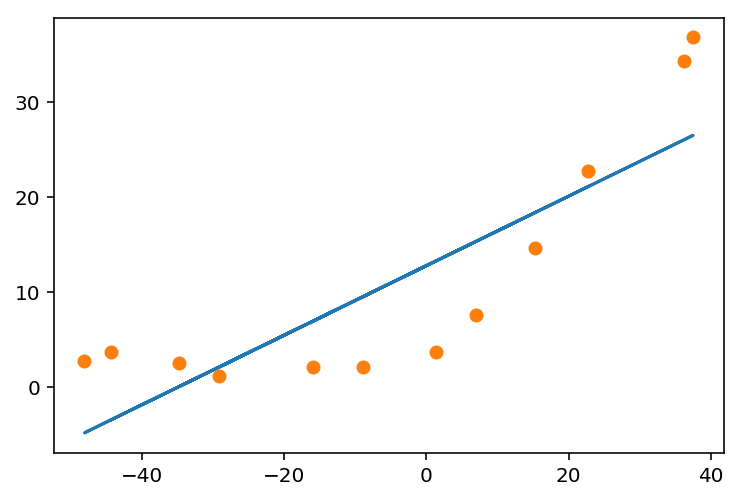

In [90]:
plt.plot(X,np.matmul(X_temp, theta))
plt.plot(X,Y,'o')

Instead of gradient descent, we can implment other optimization algorithms such as BFGS, there are many packages we can employed. For problems with more examples than features, we can use analytical method like normal equation to solve the problem. 

For higher complexity problems with more data, we can try higher order features, (mapping original features to higher order spaces). Alternatively, neural networks will give better performance. 

### Analytical method of linear gression:

In [91]:
def normalEquation(X, y):

    m = int(np.size(X))

    theta = []

    # Bais of X1 values
    bias_vector = np.ones((m, 1))

    X = np.reshape(X, (m, 1))

    X = np.append(bias_vector, X, axis=1)

    X_transpose = np.transpose(X)

    # Calculating theta
    theta = np.linalg.pinv(np.matmul(X_transpose, X))
    theta = np.matmul(theta, X_transpose)
    theta = np.matmul(theta, y)

    return theta

In [92]:
theta = normalEquation(X, Y)

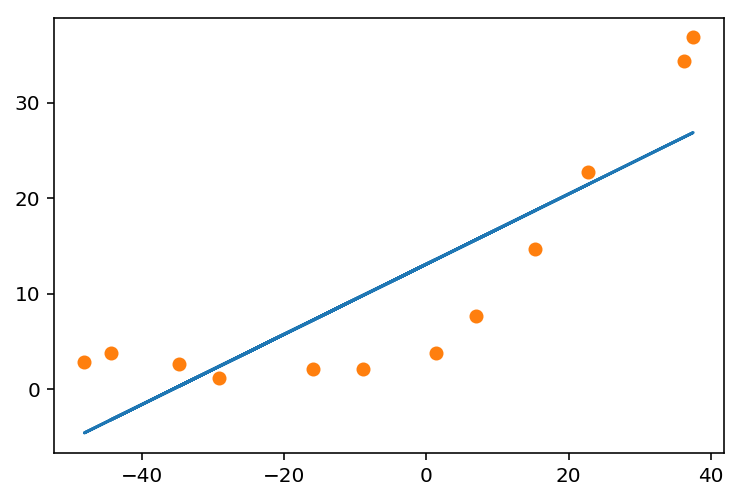

In [93]:
plt.plot(X,np.matmul(X_temp, theta))
plt.plot(X,Y,'o')

## Avocado example:

### Analytical solver:

In [94]:
def normalEquation(X, y):
    
    m = int(np.size(X[:, 0]))
    theta = []
    
    # Bais of X1 values
    bias_vector = np.ones((m, 1))

    #X = np.reshape(X, (m, 1))

    X = np.append(bias_vector, X, axis=1)

    X_transpose = np.transpose(X)

    # Calculating theta
    theta = np.linalg.pinv(np.matmul(X_transpose, X))
    theta = np.matmul(theta, X_transpose)
    theta = np.matmul(theta, y)
    
    #theta = (X'*X) \ X'*y; % the Analytical solution of linear regression.
    # theta = pinv(X' * X) * X' * y;

    # Calculating theta
    #theta = np.linalg.pinv(X_transpose.dot(X))
    #theta = theta.dot(X_transpose)
    #theta = theta.dot(y)

    return theta

In [95]:
print("number of features n:", train_features.shape[1])
print("number of examples m:", train_features.shape[0])

number of features n: 65
number of examples m: 6851


In [96]:
np.size(train_features.values) # the number of entries of tensor X. 

445315

In [101]:
### Implement the training data and labels.
X, y = train_features.values, train_targets['AveragePrice'].values[:]
### get the analytical theta weight matrix
theta_analytics = normalEquation(X, y)

### Numerical solver: 

In [102]:
#  Train linear regression with lambda = 0
X, y = train_features.values, train_targets['AveragePrice'].values[:]
lambdaa = 0.05;
alpha = 0.1;
iterations = 3000;

total_no_feature = X[0,:].size+1;

m = int(np.size(X[:, 0]))
X_temp = np.concatenate((np.ones((m)).reshape(m,1), X), axis=1).reshape(m, total_no_feature, order='F');
y = y.reshape(m,1, order='F');

initial_theta = np.array( np.zeros(np.size(X_temp,1)) ).reshape(total_no_feature, 1, order='F');
avocado_example = LinearRegression(X=X_temp, y=y, theta = initial_theta, lambdaa = lambdaa)



theta, J_history = LinearRegression.gradientDescentMulti(avocado_example, X=X_temp, y=y, theta = initial_theta, 
                                      alpha = alpha,
                                      lambdaa = lambdaa, num_iters=iterations);

In [103]:
J_history

array([[0.46861487],
       [0.44851223],
       [0.43758476],
       ...,
       [0.20729328],
       [0.207289  ],
       [0.20728473]])

In [104]:
J, gg = LinearRegression.linearRegCostFunction(avocado_example, X_temp, y, theta, lambdaa)

In [105]:
print('Training error for numerical solution of linear regression =', J)

Training error = 0.2072804654484172


In [106]:
def MSE(y, Y):
    return np.mean((y-Y)**2)

In [107]:
X_val, y_val = val_features.values, val_targets['AveragePrice'].values[:]
total_no_feature = X_val[0,:].size+1;
m = int(np.size(X_val[:, 0]))
X_val_temp = np.concatenate((np.ones((m)).reshape(m,1), X_val), axis=1).reshape(m, total_no_feature, order='F');
y_val = y_val.reshape(m,1, order='F');
J, gg = LinearRegression.linearRegCostFunction(avocado_example, X_val_temp, y_val, theta, lambdaa)

In [109]:
print('Validation error for numerical solution of linear regression =', J)

Validation error for numerical solution of linear regression = 0.3853269857526957


The validation error should be larger than training error as expected. 

In [112]:
m = int(np.size(X[:, 0]))
if(theta_analytics.shape == (theta_analytics.shape[0],)):
    theta_analytics = theta_analytics[:, np.newaxis]
X_temp = np.concatenate((np.ones((m)).reshape(m,1), X), axis=1).reshape(m, X[0,:].size+1, order='F');
J, gg = LinearRegression.linearRegCostFunction(avocado_example, X_temp, y, theta_analytics, 0)
#J, gg = LinearRegression.linearRegCostFunction(avocado_example, X_val_temp, y_val, theta_analytics.reshape(total_no_feature,1), 0)
print('Validation error for analytical solution (normal equation) =', J)

Validation error for analytical solution (normal equation) = 0.18816368504256076


In [113]:
mean, std = scaled_features['AveragePrice']

In [117]:
### This is our prediction function for linear regression
def prediction(X, theta):
    h = np.matmul(X, theta);
    return h

#### Linear regression performs on test data
We will predict the future average prices for conventional avocado against the actual future prices in our test data set.

/anaconda3/envs/deep-learning/lib/python3.6/site-packages/ipykernel_launcher.py:22: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


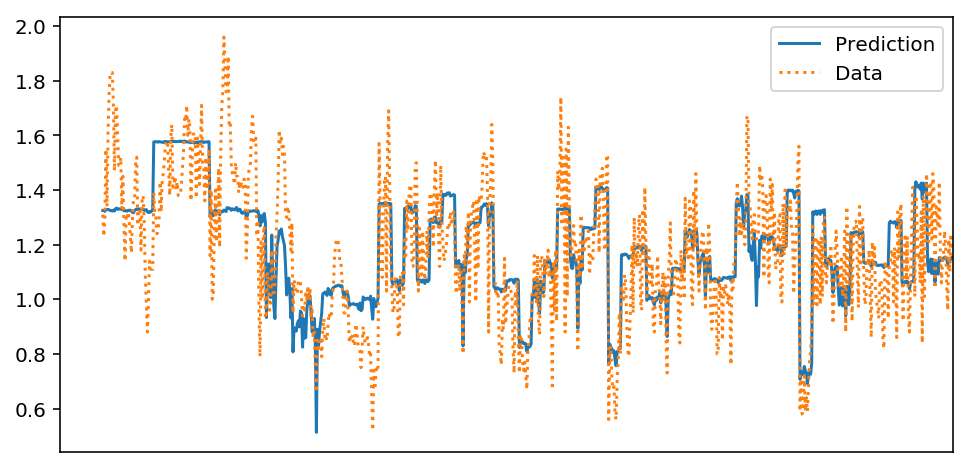

In [118]:
test_data = data_short[test_set.shape[0]:];
#test_data = data[test_set.shape[0]:];
X_test, y_test = test_features.values, test_targets['AveragePrice'].values[:]
total_no_feature = X_test[0,:].size+1;
m = int(np.size(X_test[:, 0]))
X_test_temp = np.concatenate((np.ones((m)).reshape(m,1), X_test), axis=1).reshape(m, total_no_feature, order='F');
y_test = y_test.reshape(m,1, order='F');

fig, ax = plt.subplots(figsize=(8,4))

predictions = prediction(X_test_temp, theta)*std + mean
y_test_plot = (y_test*std + mean)
predictions=predictions[:800]
y_test_plot=y_test_plot[:800]

ax.plot(predictions, label='Prediction')
ax.plot(y_test_plot, label='Data', LineStyle=':')
ax.set_xlim(right=len(predictions))
ax.legend()

dates = pd.to_datetime(avocado.ix[int(test_data.index[0]):len(y_test_plot)]['Date'])
dates = dates.apply(lambda d: d.strftime('%b %d'))
ax.set_xticks(np.arange(len(dates))[12::24])
_ = ax.set_xticklabels(dates[12::24], rotation=45)

Overall, concretely, the prediction is not so bad for simplistic linear model, it is somehow underfitted for data with more than 60 features.

## Simple one hidden layer DNN for avocado data 

Below I'll build a DN network from scratch without using pytorch and tensorflow ready to use package. I'll also set the hyperparameters: the learning rate, the number of hidden units, and the number of training passes and batch size. It should be noted that I do not implemented any SOA techniques in this case for simplicity.  

<img src="assets/neural_network.png" width=300px>

The network has two layers, a hidden layer and an output layer. The hidden layer will use the sigmoid function for activations. The output layer has only one node and is used for the regression, the output of the node is the same as the input of the node. That is, the activation function is $f(x)=x$. A function that takes the input signal and generates an output signal, but takes into account the threshold, is called an activation function. We work through each layer of our network calculating the outputs for each neuron. All of the outputs from one layer become inputs to the neurons on the next layer. This process is called *forward propagation*.

We use the weights to propagate signals forward from the input to the output layers in a neural network. We use the weights to also propagate error backwards from the output back into the network to update our weights. This is called *backpropagation*.

> **Hint:** You'll need the derivative of the output activation function ($f(x) = x$) for the backpropagation implementation. If you aren't familiar with calculus, this function is equivalent to the equation $y = x$. What is the slope of that equation? That is the derivative of $f(x)$.

In [119]:
#############
# In my_answers_NN.py file, I implemented the simple DNN. It is originally
# completed by myself as one of the projects with Udacity. I obtained the 
# high accuracy score on the original data example of bike sharing over few years. 
#############

from my_answers_NN import NeuralNetwork

In [120]:
''' the cost function, mean square error for regression analysis'''
def MSE(y, Y):
    return np.mean((y-Y)**2)

## Unit tests

Run these unit tests to check the correctness of your network implementation. This will help you be sure your network was implemented correctly befor you starting trying to train it. 

In [121]:
import unittest

inputs = np.array([[0.5, -0.2, 0.1]])
targets = np.array([[0.4]])
test_w_i_h = np.array([[0.1, -0.2],
                       [0.4, 0.5],
                       [-0.3, 0.2]])
test_w_h_o = np.array([[0.3],
                       [-0.1]])

class TestMethods(unittest.TestCase):
    
    ##########
    # Unit tests for data loading
    ##########
    
    def test_data_path(self):
        # Test that file path to dataset has been unaltered
        self.assertTrue(data_path.lower() == 'avocado.csv')
        
    def test_data_loaded(self):
        # Test that data frame loaded
        self.assertTrue(isinstance(avocado, pd.DataFrame))
    
    ##########
    # Unit tests for network functionality
    ##########

    def test_activation(self):
        network = NeuralNetwork(3, 2, 1, 0.5)
        # Test that the activation function is a sigmoid
        self.assertTrue(np.all(network.activation_function(0.5) == 1/(1+np.exp(-0.5))))

    def test_train(self):
        # Test that weights are updated correctly on training
        network = NeuralNetwork(3, 2, 1, 0.5)
        network.weights_input_to_hidden = test_w_i_h.copy()
        network.weights_hidden_to_output = test_w_h_o.copy()
        
        network.train(inputs, targets)
        self.assertTrue(np.allclose(network.weights_hidden_to_output, 
                                    np.array([[ 0.37275328], 
                                              [-0.03172939]])))
        self.assertTrue(np.allclose(network.weights_input_to_hidden,
                                    np.array([[ 0.10562014, -0.20185996], 
                                              [0.39775194, 0.50074398], 
                                              [-0.29887597, 0.19962801]])))

    def test_run(self):
        # Test correctness of run method
        network = NeuralNetwork(3, 2, 1, 0.5)
        network.weights_input_to_hidden = test_w_i_h.copy()
        network.weights_hidden_to_output = test_w_h_o.copy()

        self.assertTrue(np.allclose(network.run(inputs), 0.09998924))

suite = unittest.TestLoader().loadTestsFromModule(TestMethods())
unittest.TextTestRunner().run(suite)

.....
----------------------------------------------------------------------
Ran 5 tests in 0.007s

OK


<unittest.runner.TextTestResult run=5 errors=0 failures=0>

In [122]:
import sys

####################
### Set the hyperparameters in you my_answers_NN.py file ###
####################

from my_answers_NN import iterations, learning_rate, hidden_nodes, output_nodes


N_i = train_features.shape[1]

network = NeuralNetwork(N_i, hidden_nodes, output_nodes, learning_rate)

losses = {'train':[], 'validation':[]}
for ii in range(iterations):
    # Go through a random batch of 128 records from the training data set
    batch = np.random.choice(train_features.index, size=64)
    X, y = train_features.ix[batch].values, train_targets.ix[batch]['AveragePrice']
                             
    network.train(X, y)
    
    # Printing out the training progress
    train_loss = MSE(network.run(train_features).T, train_targets['AveragePrice'].values)
    val_loss = MSE(network.run(val_features).T, val_targets['AveragePrice'].values)
    sys.stdout.write("\rProgress: {:2.1f}".format(100 * ii/float(iterations)) \
                     + "% ... Training loss: " + str(train_loss)[:5] \
                     + " ... Validation loss: " + str(val_loss)[:5])
    sys.stdout.flush()
    
    losses['train'].append(train_loss)
    losses['validation'].append(val_loss)

Progress: 0.2% ... Training loss: 39.49 ... Validation loss: 50.74

/anaconda3/envs/deep-learning/lib/python3.6/site-packages/ipykernel_launcher.py:18: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


Progress: 100.0% ... Training loss: 0.253 ... Validation loss: 0.518

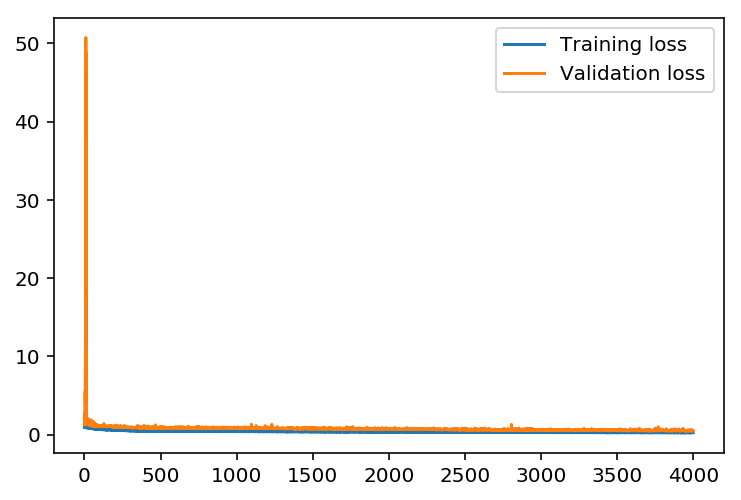

In [123]:
plt.plot(losses['train'], label='Training loss')
plt.plot(losses['validation'], label='Validation loss')
plt.legend()
_ = plt.ylim()

This is ok for a simple neural network with __only__ one hidden layer. It seems a little bit overfitting because the validation error is higher than the training error as shown. 

/anaconda3/envs/deep-learning/lib/python3.6/site-packages/ipykernel_launcher.py:15: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  from ipykernel import kernelapp as app


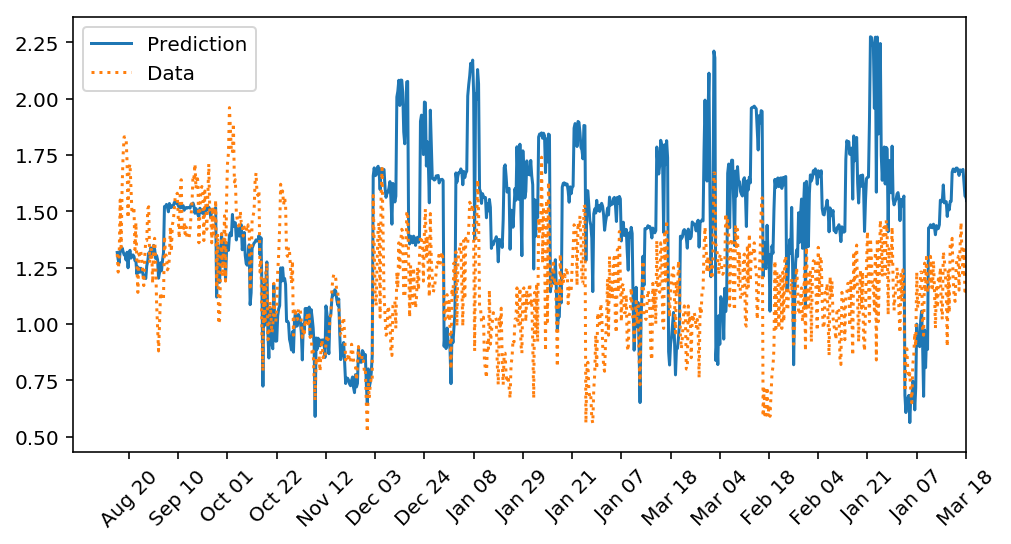

In [125]:
fig, ax = plt.subplots(figsize=(8,4))

''' sort the date in ascending order '''
avocado = pd.read_csv(data_path)
avocado = avocado.sort_values(by='Date')


#test_data = data[-int(test_set.index[0]):test_set.index[-1]];
test_data = data_short[int(test_set.index[0]):int(test_set.index[-1])+1];

mean, std = scaled_features['AveragePrice']
predictions = network.run(test_features).T*std + mean

ax.plot(predictions[0], label='Prediction')
ax.plot((test_targets['AveragePrice']*std + mean).values, label='Data', LineStyle=':')
ax.set_xlim(right=len(predictions))
ax.legend()

dates = pd.to_datetime(avocado.ix[int(test_set.index[0]):int(test_set.index[-1])+1]['Date'])
dates = dates.apply(lambda d: d.strftime('%b %d'))
ax.set_xticks(np.arange(len(dates))[12::50])
_ = ax.set_xticklabels(dates[12::50], rotation=45)

In [136]:
avocado[int(test_set.index[0]):int(test_set.index[-1])+1].tail()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
8952,6,2018-02-11,0.85,207658.32,54069.78,44325.77,286.59,108976.18,87195.47,21390.71,390.00,conventional,2018,Roanoke
8953,7,2018-02-04,0.82,287728.25,82020.39,55243.26,294.67,150169.93,116918.04,32938.52,313.37,conventional,2018,Roanoke
8954,8,2018-01-28,1.14,159289.18,31259.73,49375.92,283.44,78370.09,61701.01,16669.08,0.00,conventional,2018,Roanoke
8955,9,2018-01-21,1.11,176001.32,32866.66,52406.08,271.62,90456.96,61172.35,29271.28,13.33,conventional,2018,Roanoke
8956,10,2018-01-14,1.09,189671.57,35632.00,58767.29,184.49,95087.79,62260.15,32827.64,0.00,conventional,2018,Roanoke


It is indeed overestimated the period between 03-Dec-17 to 18-Mar-18 due to insufficient data between these periods. 

### Further studies: 
* Logistic regression on predicting the region of avocado based on its other features like Avg  - price and so. 
* Binary classification on predicting the type of avocado whether it is conventional or organic avocado. 
* Clustering problem, use K-means or other methods, to predict the region of Avocado.
* Anomaly detection to detects the outliers in the data, in order to clean the data.
* PCA can be used to reduced the dimensions (features) of the data, in order to simplify the existing problem. 
* While more data and more features are better in general, it may leads to so called `curse of dimensionality` in some cases when the training exmaples are not enough. We may use bin-counting scheme or Feature Hashing Scheme to deal with large numbers of categorical features such as IP-addresses. 

### Simple possible improvements: 
* Dropout to deal with overfitting.
* $L_1$ or $L_{2}$ Regularization.
* Batch normalization.
* Complex models, time series forecasting may considering RNN. 
* Advance optimization methods like BFGS, Adam, earling stopping algorithms.